# DBSCAN APPLICATION

**In this part**, you are required to run the dbscan algorithm on the following dataset.   
You will also expermient different values for epsioln and minPoints

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import NearestNeighbors
import numpy as np

### Creating dataset

In [ ]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.4,
                                      noise=.1)

In [ ]:
X,y=noisy_circles

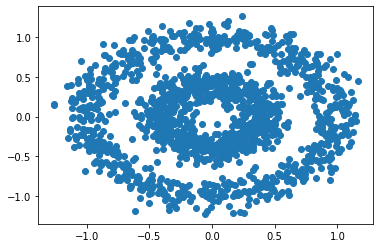

In [ ]:
plt.scatter(X[:,0], X[:,1])

### Finding Epsilon

In [ ]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

Text(0.5, 1.0, 'K-Distance Curve')

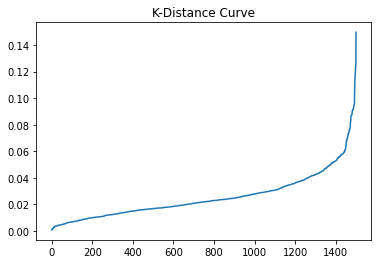

In [ ]:
plt.plot(distances)
plt.title('K-Distance Curve')

**Question**.   
What value should we choose for epsilon?

In [ ]:
from sklearn.cluster import DBSCAN

# make a dbscan object with epsilon = 0.1 and min_samples=5
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_predict = dbscan.fit_predict(X) # run fit_predicto on X

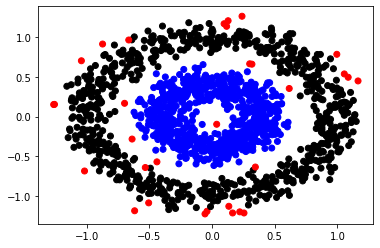

In [ ]:
# Plot the result
import matplotlib
colors = ['red','green','blue','purple', 'black']
plt.scatter(X[:,0], X[:,1], c=y_predict, cmap=matplotlib.colors.ListedColormap(colors))

In [ ]:
# make a dbscan object with epsilon = 0.01, 0.05, 0.2 with min_samples=5 min_samples=10
dbscan2 = DBSCAN(eps='0.01,0.05,0.2', min_samples='5,10')

---

# Association Rules.   
In this part you are required to load the dataset into colab from kaggle, and run the MLXtend assocation rules on it.

###  Step 1 :   
Download your api token json file from kaggle, follow this document to download it:   
https://docs.google.com/document/d/15DiXZ-UpfW6RIkkOmvO6HEd7dm-EViUOAE1_wEq97vM/edit?usp=sharing

### Step 2:   
Upload the downloaded json file into colab,   
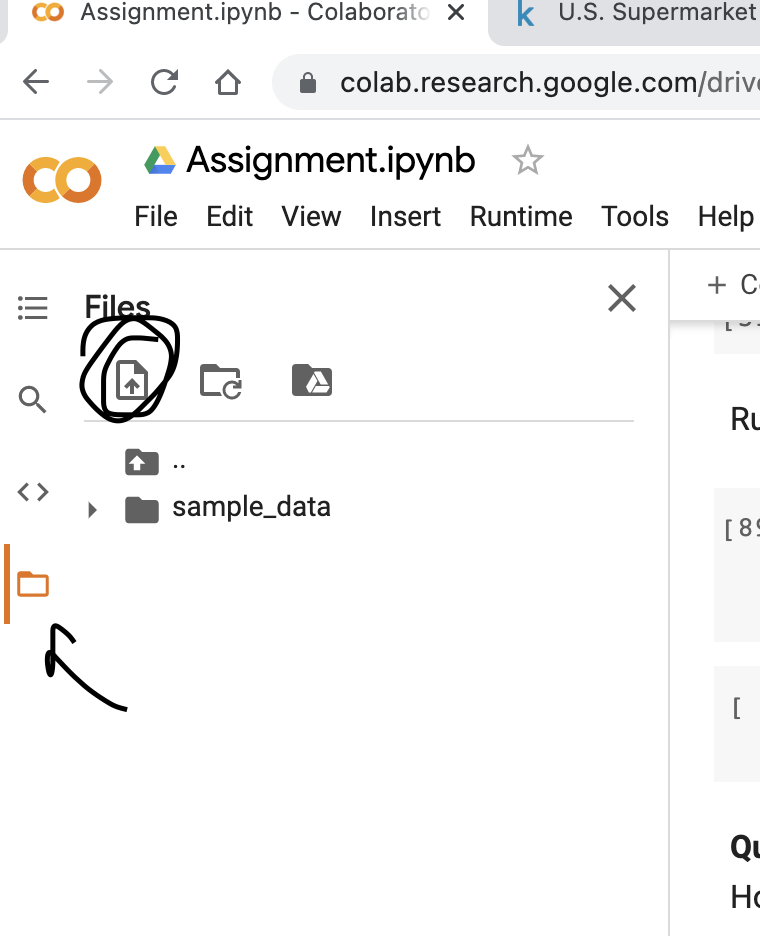

### Step 3:    
Copy the file into it's directory

In [ ]:
# Install kaggle on the colab machine
!pip install kaggle

In [ ]:
# copy the kaggle.json into the root/kaggle directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# this command should output a list of datasets from kaggle
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              233KB  2021-09-03 10:07:19          11724  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           7089  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2756  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2822  
nickuzmenkov/nih-chest-xrays-tfrecords                      NIH Chest X-rays

### Step 4:   
Download the dataset, add the last 2 parts from this url in place of the dots.    
https://www.kaggle.com/sindraanthony9985/marketing-data-for-a-supermarket-in-united-states

In [ ]:
!kaggle datasets download sindraanthony9985/marketing-data-for-a-supermarket-in-united-states

  0% 0.00/68.5k [00:00<?, ?B/s]
100% 68.5k/68.5k [00:00<00:00, 26.6MB/s]


In [ ]:
#this command will unzip the downloaded file
!unzip /content/marketing-data-for-a-supermarket-in-united-states.zip

Archive:  /content/marketing-data-for-a-supermarket-in-united-states.zip
  inflating: supermarket_marketing/50_SupermarketBranches.csv  
  inflating: supermarket_marketing/Ads_CTR_Optimisation.csv  
  inflating: supermarket_marketing/Market_Basket_Optimisation.csv  
  inflating: supermarket_marketing/Supermarket_CustomerMembers.csv  


### Step 5:    
Loading the required csv file

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data= pd.read_csv('/content/supermarket_marketing/Market_Basket_Optimisation.csv', header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# this line will remove the NaN values from the dataframe and convert it to list
df_out = data.apply(lambda x: list(x.dropna().values), axis=1).tolist()

In [ ]:
df_out

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'],
 ['low fat yogurt'],
 ['whole wheat pasta', 'french fries'],
 ['soup', 'light cream', 'shallot'],
 ['frozen vegetables', 'spaghetti', 'green tea'],
 ['french fries'],
 ['eggs', 'pet food'],
 ['cookies'],
 ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'],
 ['spaghetti', 'champagne', 'cookies'],
 ['mineral water', 'salmon'],
 ['mineral water'],
 ['shrimp',
  'chocolate',
  'chicken',
  'honey',
  'oil',
  'cooking oil',
  'low fat yogurt'],
 ['turkey', 'eggs'],
 ['turkey',
  'fresh tuna',
  'tomatoes',
  'spagh

### Step 6:   
Convert the data into one-hot encoded table

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_data = te.fit(df_out).transform(df_out) # this line will fit a transformer on the data and transform it into 1-hot encoded data

In [ ]:
new_df = pd.DataFrame(te_data, columns=te.columns_).astype(int)
new_df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### Step 7:   
Run the aprori algorithm and find the association rules

In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

#Find the frequent items on the new_df with min_support = 0.01
freq_items = apriori(new_df,min_support = 0.01 , use_colnames = True)

In [ ]:
freq_items

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(mineral water, ground beef, milk)"
253,0.017064,"(mineral water, ground beef, spaghetti)"
254,0.015731,"(mineral water, spaghetti, milk)"
255,0.010265,"(mineral water, olive oil, spaghetti)"


In [ ]:
# Find the association rules for the freq_items, using confidence metric, and min_threshold=0.1
df_ar = association_rules(freq_items, metric="confidence", min_threshold=0.1)


In [ ]:
df_ar

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080
2,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198
3,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,0.002779,1.039630
4,(chocolate),(burgers),0.163845,0.087188,0.017064,0.104150,1.194537,0.002779,1.018933
...,...,...,...,...,...,...,...,...,...
315,(olive oil),"(mineral water, spaghetti)",0.065858,0.059725,0.010265,0.155870,2.609786,0.006332,1.113898
316,"(mineral water, spaghetti)",(pancakes),0.059725,0.095054,0.011465,0.191964,2.019529,0.005788,1.119933
317,"(mineral water, pancakes)",(spaghetti),0.033729,0.174110,0.011465,0.339921,1.952333,0.005593,1.251198
318,"(spaghetti, pancakes)",(mineral water),0.025197,0.238368,0.011465,0.455026,1.908923,0.005459,1.397557


In [ ]:
# This line to print the result sorted according to the lift value
df_ar.sort_values("lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
185,(herb & pepper),(ground beef),0.049460,0.098254,0.015998,0.323450,3.291994,0.011138,1.332860
184,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
305,"(mineral water, spaghetti)",(ground beef),0.059725,0.098254,0.017064,0.285714,2.907928,0.011196,1.262445
307,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902
313,"(mineral water, spaghetti)",(olive oil),0.059725,0.065858,0.010265,0.171875,2.609786,0.006332,1.128021
...,...,...,...,...,...,...,...,...,...
133,(french fries),(mineral water),0.170911,0.238368,0.033729,0.197348,0.827912,-0.007011,0.948894
128,(ground beef),(french fries),0.098254,0.170911,0.013865,0.141113,0.825652,-0.002928,0.965306
52,(cookies),(chocolate),0.080389,0.163845,0.010399,0.129353,0.789486,-0.002773,0.960384
93,(escalope),(eggs),0.079323,0.179709,0.011065,0.139496,0.776230,-0.003190,0.953267


In [ ]:
# this will show the ground beef association rules, run it and answer the below question
df_ar[df_ar['antecedents'] == frozenset(['ground beef'])].sort_values("lift", ascending = False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
184,(ground beef),(herb & pepper),0.098254,0.049460,0.015998,0.162822,3.291994,0.011138,1.135410
307,(ground beef),"(mineral water, spaghetti)",0.098254,0.059725,0.017064,0.173677,2.907928,0.011196,1.137902
303,(ground beef),"(mineral water, milk)",0.098254,0.047994,0.011065,0.112619,2.346536,0.006350,1.072827
196,(ground beef),(spaghetti),0.098254,0.174110,0.039195,0.398915,2.291162,0.022088,1.373997
167,(ground beef),(grated cheese),0.098254,0.052393,0.011332,0.115332,2.201294,0.006184,1.071145
190,(ground beef),(olive oil),0.098254,0.065858,0.014131,0.143826,2.183889,0.007661,1.091066
267,(ground beef),"(mineral water, chocolate)",0.098254,0.052660,0.010932,0.111262,2.112849,0.005758,1.065939
281,(ground beef),"(mineral water, eggs)",0.098254,0.050927,0.010132,0.103121,2.024892,0.005128,1.058195
149,(ground beef),(frozen vegetables),0.098254,0.095321,0.016931,0.172320,1.807796,0.007565,1.093031
189,(ground beef),(mineral water),0.098254,0.238368,0.040928,0.416554,1.747522,0.017507,1.305401


**Question**   
If a customer added 'ground beef' to the cart, what itemset should you recommend to him? and why?

In [ ]:
#herb & pepper